Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [51]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv('../smiple reg/delivery_time.csv')
df.head()   ## Delivery Time is independent and Sorting Time is dependent variable 

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Delivery Time    0
Sorting Time     0
dtype: int64
Delivery Time range:  21.0
Sorting Time range:  8


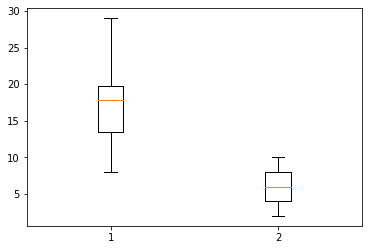

In [83]:
## Performing exploratory data analysis

# understanding the variables
print(df.isnull().sum()) ## Check for null values

print('Delivery Time range: ',np.ptp(df['Delivery Time']))
print('Sorting Time range: ',np.ptp(df['Sorting Time']))

plt.boxplot(df)
plt.show() ## boxplot shows no outliers detected in the given dataset

<AxesSubplot:xlabel='Delivery Time', ylabel='Count'>

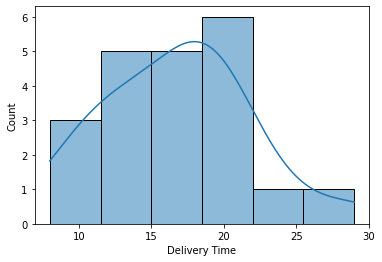

In [85]:
import seaborn as sns
sns.histplot(df['Delivery Time'],kde=True)

Coefficient:  [[0.37120067]]
Intercept value:  [0.1374478]
MSE: 1.1378667090877579
RMSE: 1.0667083524036727
MAE: 0.8431622695241282
R2: 0.8354891504933362


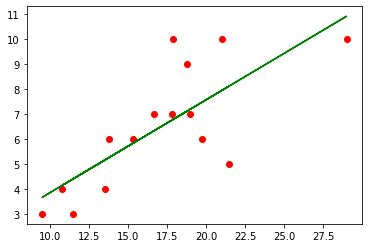

In [103]:
model1 = LinearRegression()
X = np.array(df['Delivery Time'])
y = np.array(df['Sorting Time'])
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

model1.fit(X_train,y_train)

predictions = model1.predict(X_test)

# Calculate the MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate the R2
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Coefficient: ',model1.coef_)
print('Intercept value: ',model1.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model1.predict(X_train),color='green')

Coefficient:  [0.74106455]
Intercept value:  0.07247133817300129
MSE: 0.18489285877218145
RMSE: 0.429991696166544
MAE: 0.33987994337848054
R2: 0.8354891504933365


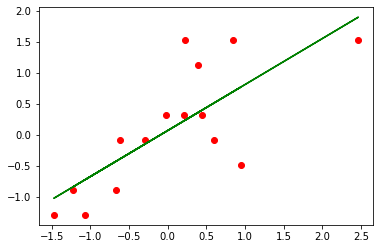

In [96]:
## Normalising data before fitting the model
del_time = np.array(df['Delivery Time'])
sort_time = np.array(df['Sorting Time'])

del_mean = np.mean(del_time)
del_std = np.std(del_time)
sort_mean = np.mean(sort_time)
sort_std = np.std(sort_time)

norm_del = (del_time-del_mean)/(del_std)
norm_sort = (sort_time-sort_mean)/(sort_std)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(norm_del.reshape(-1, 1), norm_sort, test_size=0.25,random_state=1)

# Create a linear regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
predictions = model2.predict(X_test)

# Calculate the MSE RMSE and R2
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)


# Print the evaluation metrics
print('Coefficient: ',model2.coef_)
print('Intercept value: ',model2.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model2.predict(X_train),color='green')

Build a prediction model for Salary_hike

In [143]:
salary_df = pd.read_csv('../smiple reg/Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Null values
YearsExperience    0
Salary             0
dtype: int64
Years of experience range:  9.4
Salary range:  84660.0


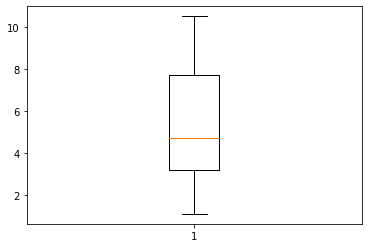

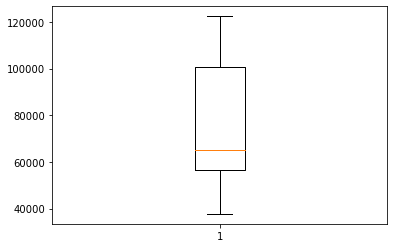

In [275]:
## Performing exploratory data analysis

# understanding the variables
print('Null values')
print(salary_df.isnull().sum()) ## Check for null values

print('Years of experience range: ',np.ptp(salary_df['YearsExperience']))
print('Salary range: ',np.ptp(salary_df['Salary']))

for col in salary_df.columns:

    plt.boxplot(salary_df[col])
    plt.show() ## boxplot shows no outliers detected in the given dataset

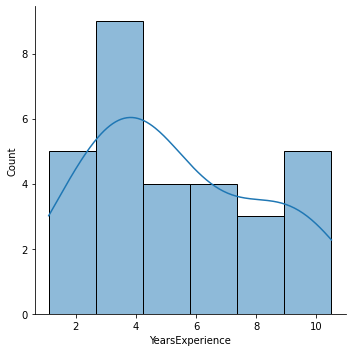

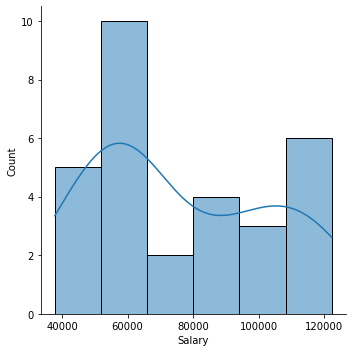

In [144]:
for col in salary_df.columns:
    sns.displot(salary_df[col],kde=True)
    plt.show()

Coefficient:  [9261.56845302]
Intercept value:  25892.305719071206
MSE: 5215.55372271297
RMSE: 72.21879064836914
MAE: 5215.55372271297
R2: 0.9180980074804028


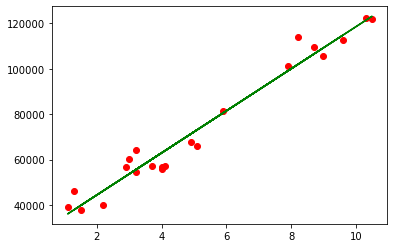

In [151]:
model_a = LinearRegression()

X = np.array(salary_df['YearsExperience'])
y = np.array(salary_df['Salary'])

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

model_a.fit(X_train,y_train)

predictions = model_a.predict(X_test)

## Calculate MSE and RMSE

mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

## Calculate MAE
mae = mean_absolute_error(y_test,predictions)

## Calculate R2
r2 = r2_score(y_test,predictions)


# Print the evaluation metrics
print('Coefficient: ',model_a.coef_)
print('Intercept value: ',model_a.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model_a.predict(X_train),color='green')

Coefficient:  [0.95873945]
Intercept value:  -0.03342381800693605
MSE: 0.19350083104049498
RMSE: 0.4398872935656303
MAE: 0.19350083104049498
R2: 0.9180980074804029


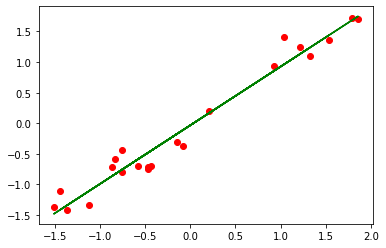

In [149]:
model_b = LinearRegression()

X = np.array(salary_df['YearsExperience'])
y = np.array(salary_df['Salary'])


## normalisation
X_norm = (X - X.mean())/(X.std())
y_norm = (y - y.mean())/(y.std())
X_train, X_test, y_train, y_test = train_test_split(X_norm.reshape(-1,1),y_norm,test_size=0.25,random_state=1)

model_b.fit(X_train,y_train)

predictions = model_b.predict(X_test)

## Calculate MSE and RMSE

mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

## Calculate MAE
mae = mean_absolute_error(y_test,predictions)

## Calculate R2
r2 = r2_score(y_test,predictions)


# Print the evaluation metrics
print('Coefficient: ',model_b.coef_)
print('Intercept value: ',model_b.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model_b.predict(X_train),color='green')

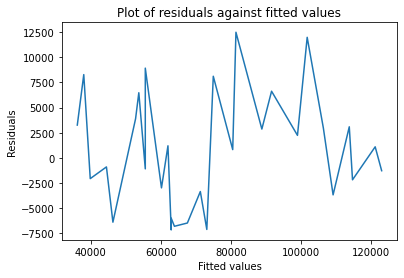

Residuals distributed around 0 indicated the model is properly fitted.


In [155]:
# Calculate the residuals
residuals = y - model_a.predict(X.reshape(-1,1))

# Create a plot of the residuals against the fitted values
plt.plot(model_a.predict(X.reshape(-1,1)), residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Plot of residuals against fitted values")
plt.show()
print("Residuals distributed around 0 indicated the model is properly fitted.")

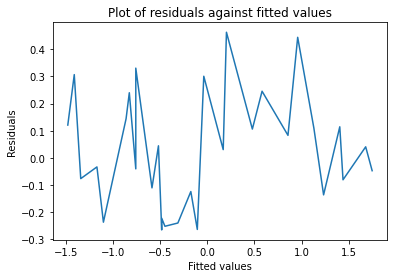

Residuals distributed around 0 indicated the model is properly fitted.


In [154]:
# Calculate the residuals
residuals = y_norm - model_b.predict(X_norm.reshape(-1,1))

# Create a plot of the residuals against the fitted values
plt.plot(model_b.predict(X_norm.reshape(-1,1)), residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Plot of residuals against fitted values")
plt.show()
print("Residuals distributed around 0 indicated the model is properly fitted.")

In [157]:
print(st.shapiro(residuals))
print("Shapiro test on residuals show normality. Which tells the model is able to explain most of its predictions")

ShapiroResult(statistic=0.9529391527175903, pvalue=0.20252954959869385)
Shapiro test on residuals show normality. Which tells the model is able to explain most of its predictions


##### Logistic Regression

Whether the client has subscribed a term deposit or not 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv('../log reg/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
## Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


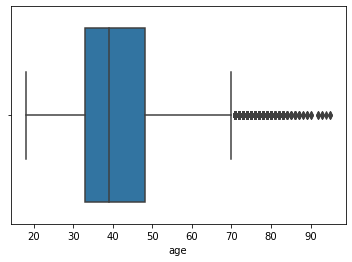

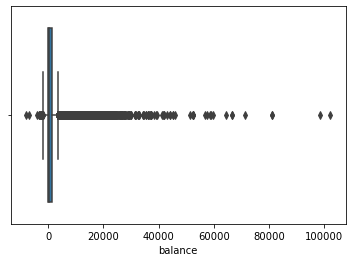

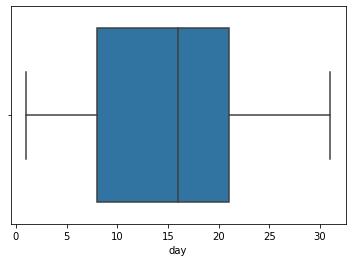

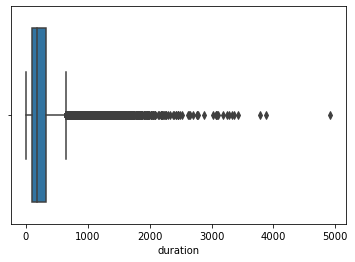

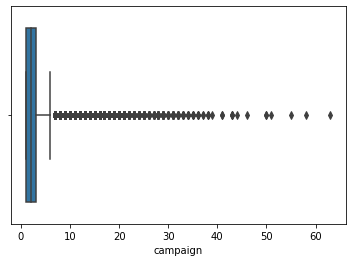

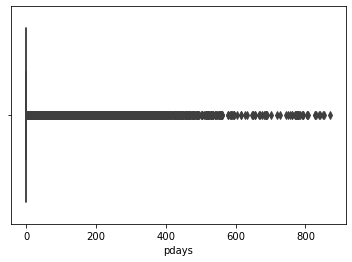

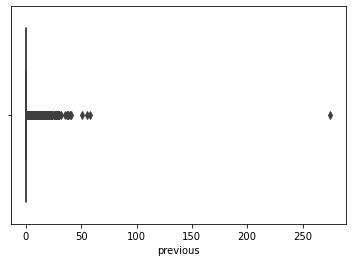

In [8]:
for col in df.columns:
    try:
        sns.boxplot(x=col, data=df)
        plt.show()
    except:
        pass

In [9]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

encoder = LabelEncoder()

for i in X.columns:
    if X[i].dtype == np.object:
        X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

model = LogisticRegression(solver='liblinear')

model.fit(X_train,y_train)

predictions = model.predict(X_test)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predictions)

print("AUC:", auc)

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
accuracy

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AUC: 0.5930962054479861


0.8901176678757852

In [10]:
## Now removing the outliers to see how the model is performing
filtered_data = df
for col in df.columns:
    if df[col].dtypes == 'int64':
        q1 = filtered_data[col].quantile(0.25)
        q3 = filtered_data[col].quantile(0.75)
        iqr = q3 - q1

        # Calculate the lower and upper bounds
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify the outlier rows
        outlier_rows = filtered_data[(filtered_data[col] < lower_bound) | (filtered_data[col] > upper_bound)].index

        filtered_data = filtered_data.drop(outlier_rows)
        filtered_data.reset_index()

In [11]:
filtered_data.shape

(28069, 17)

In [12]:
X = filtered_data[filtered_data.columns[:-1]]
y = filtered_data[filtered_data.columns[-1]]

encoder = LabelEncoder()

for i in X.columns:
    if X[i].dtype == np.object:
        X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

model = LogisticRegression(solver='liblinear')

model.fit(X_train,y_train)

predictions = model.predict(X_test)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predictions)

print("AUC:", auc)

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
accuracy

c:\Users\Naveen\miniconda3\envs\vconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AUC: 0.5295123148987609


0.9432886862353947

The model seem to perform better after removing the outliers from the data.

In [13]:
## Try other models to see if they learn better than logistic regression model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [14]:
svm_clf = SVC()

# Train the support vector machine classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the testing set
svm_preds = svm_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, svm_preds)

print("AUC value for support vector machine:", auc_value)
accuracy = accuracy_score(y_test, svm_preds)
print('Accuracy score for SVM model: ',accuracy)
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the decision tree classifier
dt_clf.fit(X_train, y_train)

# Make predictions on the testing set
dt_preds = dt_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, dt_preds)

print("AUC value for decision tree:", auc_value)
accuracy = accuracy_score(y_test, dt_preds)
print('Accuracy score for SVM model: ',accuracy)

AUC value for support vector machine: 0.5
Accuracy score for SVM model:  0.9430037047591906
AUC value for decision tree: 0.6587288455726805
Accuracy score for SVM model:  0.9256198347107438


In [18]:
## It seems SVM and Decision trees are performing better on this data
## normalising the data to see how models are performing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)
scaled_data

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.25,random_state=1)
svm_clf = SVC()

# Train the support vector machine classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the testing set
svm_preds = svm_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, svm_preds)

print("AUC value for support vector machine:", auc_value)
accuracy = accuracy_score(y_test, svm_preds)
print('Accuracy score for SVM model: ',accuracy)
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the decision tree classifier
dt_clf.fit(X_train, y_train)

# Make predictions on the testing set
dt_preds = dt_clf.predict(X_test)

# Calculate the AUC value
auc_value = roc_auc_score(y_test, dt_preds)

print("AUC value for decision tree:", auc_value)
accuracy = accuracy_score(y_test, dt_preds)
print('Accuracy score for decision tree model: ',accuracy)

AUC value for support vector machine: 0.5
Accuracy score for SVM model:  0.9430037047591906
AUC value for decision tree: 0.656002190994258
Accuracy score for decision tree model:  0.9249073810202337


Inference: Decision tree model shows better perfomance compared to log reg and svm model. 

##### Multiple regression

Prepare a prediction model for predicting Price

In [78]:
df = pd.read_csv('../multi lin/ToyotaCorolla.csv',encoding='unicode_escape')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [79]:
df_pred = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df_pred.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [80]:
df_pred.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [81]:
len(df_pred.columns)

9

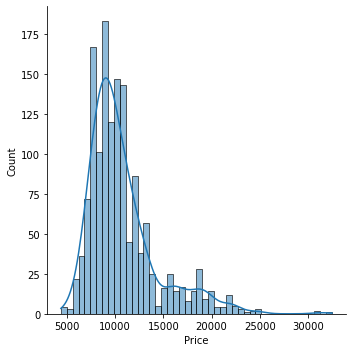

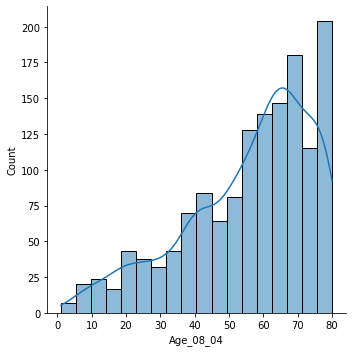

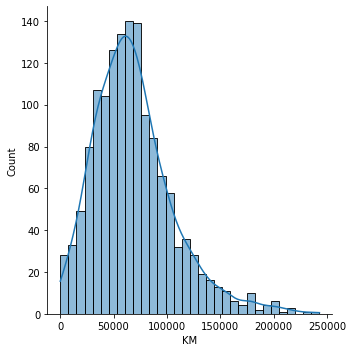

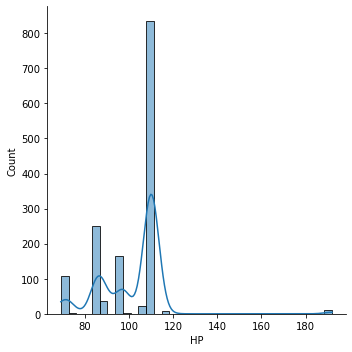

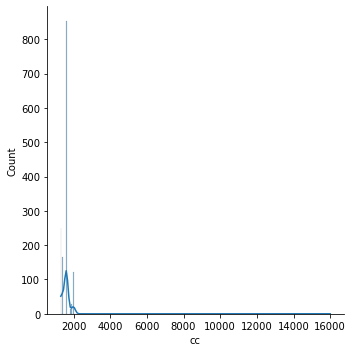

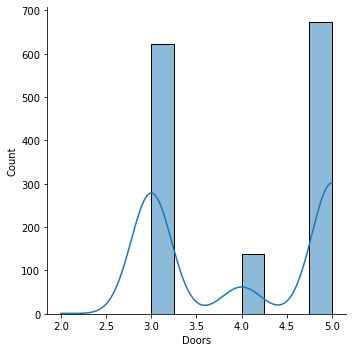

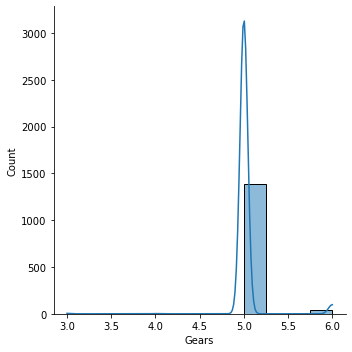

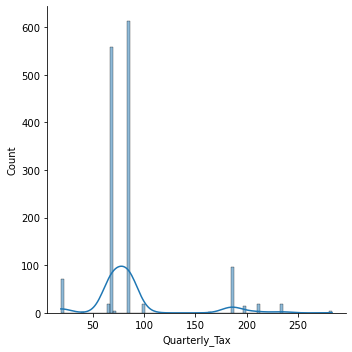

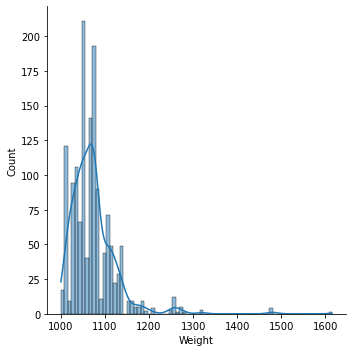

In [82]:
## EDA
for col in df_pred.columns:
    sns.displot(df_pred[col],kde=True)

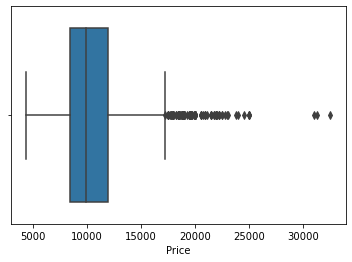

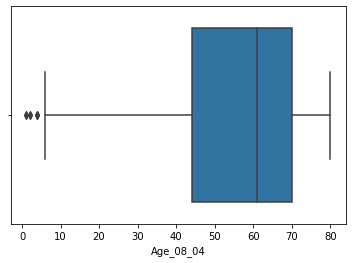

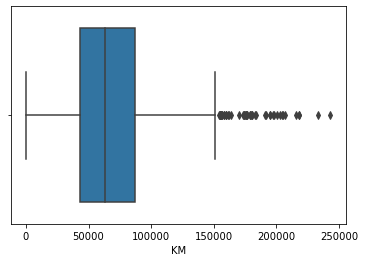

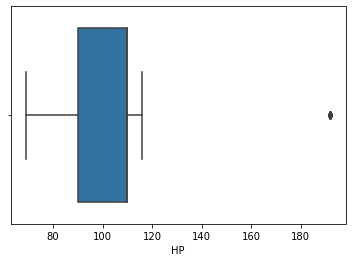

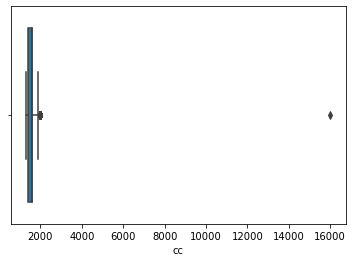

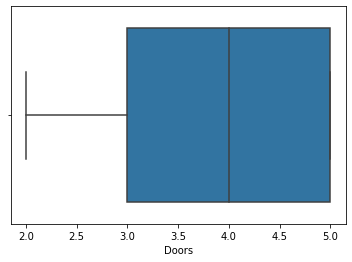

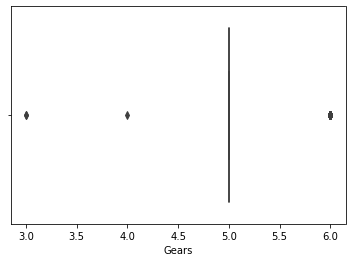

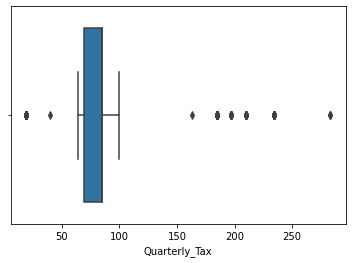

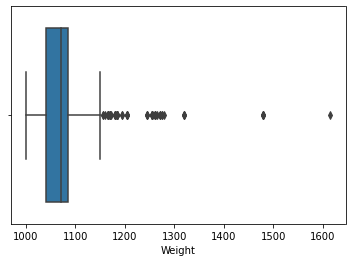

In [83]:
## check for outliers
for col in df_pred.columns:
    sns.boxplot(df_pred[col])
    plt.show()

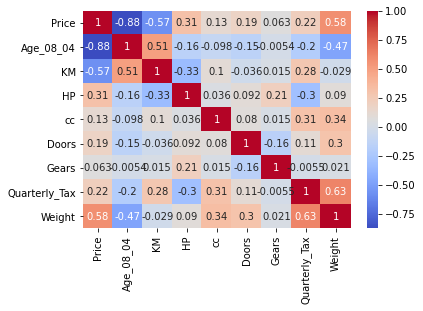

In [35]:
## check multicolinearity 
sns.heatmap(df_pred.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [94]:
## model without any changes in the data

X = df_pred[df_pred.columns[1:]]
y = df_pred[df_pred.columns[0]]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept: ", model.intercept_)
print("Coefficients:")
print(list(zip(X, model.coef_)))

predictions = model.predict(X_test)

# Calculate the MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate the R2
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

Intercept:  -3947.0086558993517
Coefficients:
[('Age_08_04', -122.50822243291138), ('KM', -0.017699768993007244), ('HP', 45.488613732945126), ('cc', -2.4947933559736835), ('Doors', -16.7980358726801), ('Gears', 504.26622843402833), ('Quarterly_Tax', 11.013549121377281), ('Weight', 17.325116860956136)]
MSE: 4748019.455707897
RMSE: 2178.9950563752773
MAE: 1045.150655234117
R2: 0.6252011830071655


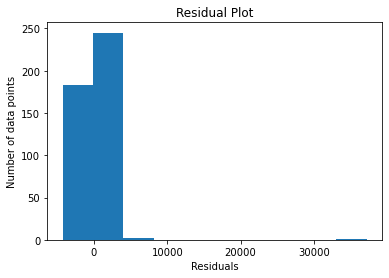

ShapiroResult(statistic=0.4675544500350952, pvalue=7.75412552632518e-34)


In [95]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - model.predict(X_test)

# Plot the residuals
plt.hist(residuals)

# Set the labels and title
plt.xlabel('Residuals')
plt.ylabel('Number of data points')
plt.title('Residual Plot')

# Show the plot
plt.show()

print(st.shapiro(residuals))


Intercept:  -18495681.8900424
Coefficients:
[('Age_08_04', -9.127916960362128), ('KM', -4.584684400444201), ('HP', 573.0819031714126), ('cc', 26339349.498900913), ('Doors', 330.6412308451264), ('Gears', 2396.37448510708), ('Quarterly_Tax', 487.8866100901472), ('Weight', 0.0)]
MSE: 2707641.252374881
RMSE: 1645.491188786765
MAE: 1249.8912989949492
R2: 0.7862644103087824


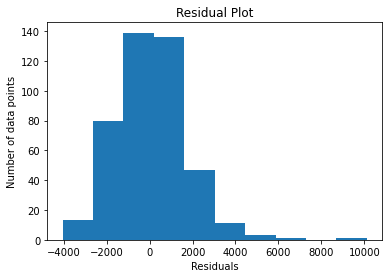

In [96]:
## Use BoxCox transformation to transform outliers

from scipy.stats import boxcox

for col in X.columns:
    X[col],lambda_ = boxcox(X[col])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept: ", model.intercept_)
print("Coefficients:")
print(list(zip(X, model.coef_)))

predictions = model.predict(X_test)

# Calculate the MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate the R2
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - model.predict(X_test)

# Plot the residuals
plt.hist(residuals)

# Set the labels and title
plt.xlabel('Residuals')
plt.ylabel('Number of data points')
plt.title('Residual Plot')

# Show the plot
plt.show()


In [97]:
print(st.shapiro(residuals))

ShapiroResult(statistic=0.9634318947792053, pvalue=6.994653745096002e-09)


Intercept:  26259.200839456535
Coefficients:
[('R&D Spend', 103.15439847653656), ('Administration', -1.6525318301711467e-06), ('Marketing Spend', -1.162226584567279), ('State', 170.26264634707505)]
MSE: 167092972.79757938
RMSE: 12926.444708332581
MAE: 11119.63164864163
R2: 0.894651759222566


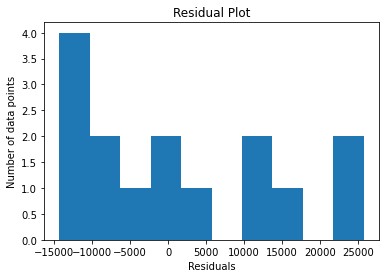

In [161]:
## Use BoxCox transformation to transform outliers

from scipy.stats import yeojohnson

for col in X.columns:
    X[col],lambda_ = yeojohnson(X[col])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

model = LinearRegression()
model.fit(X_train,y_train)

print("Intercept: ", model.intercept_)
print("Coefficients:")
print(list(zip(X, model.coef_)))

predictions = model.predict(X_test)

# Calculate the MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Calculate the MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate the R2
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - model.predict(X_test)

# Plot the residuals
plt.hist(residuals)

# Set the labels and title
plt.xlabel('Residuals')
plt.ylabel('Number of data points')
plt.title('Residual Plot')

# Show the plot
plt.show()


In [162]:
print(st.shapiro(residuals))

ShapiroResult(statistic=0.895404040813446, pvalue=0.08099252730607986)


Inference: because the data is skewed, model with yeonjhonson transformation works better.

Prepare a prediction model for profit of 50_startups data.

In [158]:
df = pd.read_csv('../multi lin/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


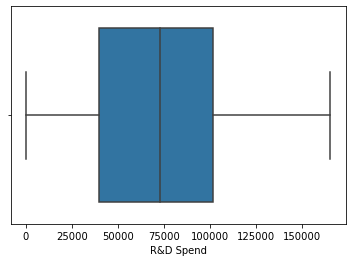

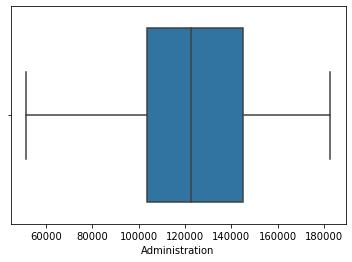

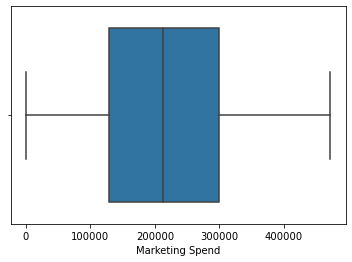

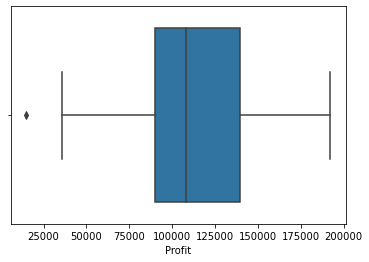

In [101]:
## outlier analysis

for col in df.columns:
    try:
        sns.boxplot(df[col])
        plt.show()
    except:
        pass

In [108]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtypes == np.object:
        X[col] = encoder.fit_transform(X[col])

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=1)


model = LinearRegression()

model.fit(X_train,y_train)

predictions = model.predict(X_test)

## Calculate MSE and RMSE

mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

## Calculate MAE
mae = mean_absolute_error(y_test,predictions)

## Calculate R2
r2 = r2_score(y_test,predictions)


# Print the evaluation metrics
print('Coefficient: ',model.coef_)
print('Intercept value: ',model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)



Coefficient:  [ 7.71026662e-01 -1.41447139e-02  3.47133854e-02 -2.33476536e+02]
Intercept value:  49296.48376651213
MSE: 7212.664742658505
RMSE: 84.92740866562752
MAE: 7212.664742658505
R2: 0.9534123822700766


In [110]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train,y_train)

predictions = model.predict(X_test)

## Calculate MSE and RMSE

mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

## Calculate MAE
mae = mean_absolute_error(y_test,predictions)

## Calculate R2
r2 = r2_score(y_test,predictions)


# Print the evaluation metrics
#print('Coefficient: ',model.coef_)
#print('Intercept value: ',model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


MSE: 8067.975695109775
RMSE: 89.82191099675944
MAE: 8067.975695109775
R2: 0.9244170156276099


In [117]:
from scipy.stats import yeojohnson

X = df[df.columns[:-1]]
y = df[df.columns[-1]]
encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtypes == np.object:
        X[col] = encoder.fit_transform(X[col])

for col in X.columns:
    X[col], lambda_ = yeojohnson(X[col])


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=1)


model = LinearRegression()

model.fit(X_train,y_train)

predictions = model.predict(X_test)

## Calculate MSE and RMSE

mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

## Calculate MAE
mae = mean_absolute_error(y_test,predictions)

## Calculate R2
r2 = r2_score(y_test,predictions)


# Print the evaluation metrics
print('Coefficient: ',model.coef_)
print('Intercept value: ',model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)



Coefficient:  [ 1.03154398e+02 -1.65253183e-06 -1.16222658e+00  1.70262646e+02]
Intercept value:  26259.200839456535
MSE: 11119.63164864163
RMSE: 105.44966405181968
MAE: 11119.63164864163
R2: 0.894651759222566


Inference: Transformations did not make a significant difference in improving the model perfomance